# TP5 Algorithme de gradient et de Newton

L'objectif de ce TP est de tester les algorithmes de la descente du gradient et de Newton pour chercher le minimum de la fonction (convexe) de plusieurs variables

$$f(x,y) = x^2 + 2y^2 - \frac{xy}{4} + 3x - 5y + 20.$$

In [55]:
import math
import numpy as np
import matplotlib.pyplot as plt
import sys

In [7]:
def f(x,y):
    """
    Fonction à minimiser
    """
    return x+y # Modifier

L'algorithme du gradient consiste à construire une suite de points $(x^n,y^n)$ faisant décroître $f$, donc tels que 
$$
f(x^{n+1},y^{n+1}) < f(x^n,y^n).
$$
Dans cet algorithme, le nouveau point $(x^{n+1},y^{n+1})$ est défini à partir d'une direction de descente $d=(d_x,d_y)$ (dépendant de la position $(x,y)$). En particulier, nous écrivons
$$(x^{n+1},y^{n+1}) = (x^n,y^n) + \alpha (d_x,d_y),$$
tel que l'inégalité ci-dessus soit satisfaite pour un coefficient $\alpha>0$ suffisament petit (à déterminer).

# Question 1

On commence par calculer la direction de descente qui nous permet de minimiser $f$.
Modifiez le contenu des fonctions ci-dessous de telle sorte que `gradient_f` calcule le gradient de $f$ au point $(x,y)$ et que 'direction_descente' donne la direction de descente normalisée au point $(x,y)$.

In [8]:
"""
Calcul du gradient de f au point (x,y).
"""
def gradient_f(x,y):
    """
    Dérivée de f
    """
    dx    =  1. # Modifier
    dy    =  0. # Modifier
    return [dx, dy]

In [58]:
"""
Calcul de la direction de descente normalisée.
"""
def direction_descente(x,y):
    """
    Dérivée de f normalisée.
    """
    [dx,dy] = gradient_f(x,y) 
    norme   = 1. # Modifier
    return [1., 1.] # Modifier

# Question 2

Pour le moment, le coefficient de descente $\alpha$ est arbitrairement petit. Le but de cette question est de construire un algorithme de dichotomie pour calculer la valeur $\alpha^{*}$ telle que la position $(x^{new},y^{new})=(x+\alpha^* d_x, y+\alpha^* d_y)$ soit telle que
$$
f(x^{new},y^{new}) < f(x,y).
$$

In [59]:
"""
INPUTS
(x,y)          point d'où l'on part 
(dx,dy)        direction de descente
alpha_max      valeur maximale du coefficent alpha (choisie à priori)
n_max          nombre d'iterations maximal dans la méthode de dichotomie

OUTPUT
(x_new,y_new)  nouvelle position
"""


def descente(x,y,alpha_max,n_max):
    n = 0
    [dx,dy] = [1.,1.] # Modifier
    x_new = x + alpha_max * dx
    y_new = y + alpha_max * dy
    while ( n < n_max and f(x_new,y_new) > f(x,y) ):
        x_new = (x )/2. # Modifier
        y_new = (y )/2. # Modifier
        n += 1
    return [x_new,y_new]

# Quesiton 3

Implementez l'algorithme du gradient, dans la fonction 'algorithme_descente', qui permet de calculer les points de la suite $(x^n,y^n)$.

In [60]:
"""
INPUTS 
(x_0,y_0)    point initial
desc         algorithme de descente
alpha_max    valeur maximale du coefficient de descente (choisie random)
n_max        nombre maximal d'iterations
res_max      residu maximal

OUTPUT
(x,y)        vecteurs des abscisses x_n et des ordonnées y_n à chaque itération
"""

def algorithme_descente(x_0,y_0,desc,alpha_max,n_max,res_max):
    x     = [x_0]
    y     = [y_0]
    res   = 1.
    n     = 0
    while (n < n_max and abs(res) > res_max):
        [x_new,y_new] = [x[n],y[n]] # Modifier
        x.append(x_new)
        y.append(y_new)
        res = f(x_new,y_new) - f(x[n],y[n])
        n += 1
    return [x,y,n]

# Question 4

Tracez les positions des éléments de la suite $(x^n,y^n)$ pour $n_{\max}=100$ itérations de l'algorithme.
Comment est la direction de descente $d(x,y)$ aux points $(x^n,y^n)$ par rapport aux lignes de champs $f(x,y)=constante$?

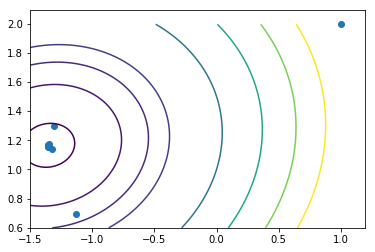

[[1.0, -1.1332045841298974, -1.3071244805907314, -1.3257273319619047, -1.346238207937136, -1.3532848292174724, -1.3544597106944818, -1.354300536465593], [2.0, 0.6963749763650626, 1.296688952226905, 1.141550316095018, 1.1747946069278616, 1.1565788210514847, 1.166273514711194, 1.1650632338825255]]
15.055119846320355
7


In [61]:
x     = [1.]
y     = [2.]

n_max     = 100
alpha_max = 20.
res_max   = 0.00001

[x,y,n_iter]  = algorithme_descente(x[0],y[0],descente,alpha_max,n_max,res_max)

fig1   = plt.figure(1)
delta  = 0.005
x_grid = np.arange(-1.5, 1.2, delta)
y_grid = np.arange( 0.6, 2.0, delta)
Z      = [[f(x0,x1) for x0 in x_grid] for x1 in y_grid]
V      = [15.1, 15.4, 15.7, 16., 17., 18., 19., 20]
CS     = plt.contour(x_grid,y_grid,Z,V)
plt.scatter(x,y)
#plt.legend()
plt.show()

print([x,y])
print(f(x[n_iter-1],y[n_iter-1]))
print(n_iter)

# Question 5

On considère maintenant l'algorithme de Newton. Pour l'implémenter, complétez d'abord la fonction 'Hessienne_f' de façon qu'elle donne la matrice hessienne de la fonction $f$. En suite implémentez la fonction 'direction_Newton', qui renvoie la direction de descente pour l'algorithme de Newton. En fin, implémentez l'algorithme dans la fonction 'algorithme_Newton'.


In [62]:
def Hessienne_f(x,y):
    '''
    Matrice Hessienne de f en (x,y)
    '''
    return [[2.,-1],[-1,4.]] # Modifier

def direction_Newton(x,y):
    '''
    Calcul de la direction de l'algorithme de Newton
    '''
    H         = Hessienne_f(x,y)
    gr        = gradient_f(x,y)
    direction = [1.,0.] # utiliser np.linalg.solve(Matrice, vecteur)
    dx        = direction[0]
    dy        = direction[1]
    return [-dx,-dy]

"""
INPUTS 
(x_0,y_0)    point initial
direction    direction de descente
n_max        nombre maximal d'iterations
res_max      residu maximal

OUTPUT
(x,y)        vecteurs des abscisses x_n et des ordonnées y_n à chaque itération
"""

def algorithme_Newton(x_0,y_0,direction,n_max,res_max):
    '''
    Algorithme de Newton
    '''
    x     = [x_0]
    y     = [y_0]
    res   = 1.
    n     = 0
    while (n < n_max and abs(res) > res_max):
        [dx,dy] = [x[n],y[n]] # Modifier
        x_new = x[n] + dx
        y_new = y[n] + dy
        x.append(x_new)
        y.append(y_new)
        res = f(x_new,y_new) - f(x[n],y[n])
        n += 1
    return [x,y,n]

Tracez les positions de la suite $(x^n,y^n)$ pour l'algorithme de Newton et comparez avec l'algorithme de gradient.

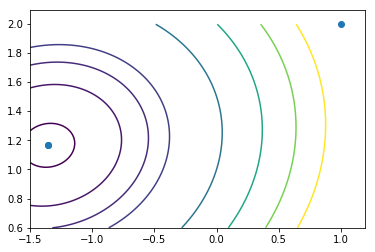

In [64]:
x     = [1.]
y     = [2.]

n_max = 100

[x,y, n_iter] = algorithme_Newton(x[0],y[0],direction_Newton,n_max,res_max)

fig2   = plt.figure(2)
CS     = plt.contour(x_grid,y_grid,Z,V)
plt.scatter(x,y)
#plt.legend()
plt.show()

# Question 7

Reprenez la méthode du gradient et la méthode de Newton sur la fonction $h = f^2$. Comparez.

In [65]:
def h(x,y):
    """
    Fonction à minimiser
    """
    return f(x,y)**2

In [66]:
"""
Calcul du gradient de h au point (x,y).
"""
def gradient_h(x,y):
    """
    Dérivée de h
    """
    [dx_f,dy_f] = gradient_f(x,y)
    dx          =  2. # Modifier
    dy          =  2. # Modifier
    return [dx, dy]

"""
Calcul de la direction de descente normalisée.
"""
def direction_descente_h(x,y):
    """
    Dérivée de h normalisée.
    """
    [dx,dy] = gradient_h(x,y)
    norme   = math.sqrt(dx**2 + dy**2)
    return [-dx/norme, -dy/norme]

def descente_h(x,y,alpha_max,n_max):
    n = 0
    [dx,dy] = [1.,0.] # Modifier
    x_new = x + alpha_max * dx
    y_new = y + alpha_max * dy
    while ( n < n_max and h(x_new,y_new) > h(x,y) ):
        x_new = (x + x_new)/2.
        y_new = (y + y_new)/2.
        n += 1
    return [x_new,y_new]

def algorithme_descente_h(x_0,y_0,desc,alpha_max,n_max,res_max):
    x     = [x_0]
    y     = [y_0]
    res   = 1.
    n     = 0
    while (n < n_max and abs(res) > res_max):
        [x_new,y_new] = [x[n],y[n]] # Modifier
        x.append(x_new)
        y.append(y_new)
        res = h(x_new,y_new) - h(x[n],y[n])
        n += 1
    return [x,y,n]

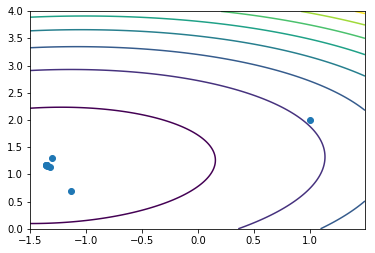

[[1.0, -1.1332045841298974, -1.3071244805907314, -1.3257273319619047, -1.3462382079371358, -1.3532848292174724, -1.3544597106944818, -1.354300536465593, -1.3543349796404391], [2.0, 0.6963749763650626, 1.296688952226905, 1.1415503160950178, 1.1747946069278614, 1.1565788210514847, 1.166273514711194, 1.1650632338825255, 1.1653664597474647]]
15.055118282817064
8


In [78]:
x     = [1.]
y     = [2.]

n_max     = 100
alpha_max = 20.
res_max   = 0.00001

[x,y,n_iter]  = algorithme_descente_h(x[0],y[0],descente_h,alpha_max,n_max,res_max)

fig3   = plt.figure(3)
delta  = 0.005
x_grid = np.arange(-1.5, 1.5, delta)
y_grid = np.arange( 0., 4.0, delta)
Z      = [[h(x0,x1) for x0 in x_grid] for x1 in y_grid]
CS     = plt.contour(x_grid,y_grid,Z)
plt.scatter(x,y)
plt.show()

print([x,y])
print(f(x[n_iter-1],y[n_iter-1]))
print(n_iter)

In [68]:
def Hessienne_h(x,y):
    '''
    Matrice hessienne de h en (x,y)
    '''
    val_f  = f(x,y)
    [gr1,gr2]  = gradient_f(x,y)
    [[H_11,H_12],[H_21,H_22]] = Hessienne_f(x,y)
    H_g_11 = 2.# Modifier
    H_g_12 = 2.# Modifier
    H_g_21 = 2.# Modifier
    H_g_22 = 2.# Modifier
    return [[H_g_11,H_g_12],[H_g_21,H_g_22]]

def direction_Newton_h(x,y):
    '''
    Calcul de la direction de l'algorithme de Newton
    '''
    H         = Hessienne_h(x,y)
    gr        = gradient_h(x,y)
    direction = np.linalg.solve(H, gr)
    dx        = direction[0]
    dy        = direction[1]
    return [-dx,-dy]

def algorithme_Newton_h(x_0,y_0,direction,n_max,res_max):
    '''
    Algorithme de Newton
    '''
    x     = [x_0]
    y     = [y_0]
    res   = 1.
    n     = 0
    while (n < n_max and abs(res) > res_max):
        [dx,dy] = [x[n],y[n]] # Modifier
        x_new = x[n] + dx
        y_new = y[n] + dy
        x.append(x_new)
        y.append(y_new)
        res = h(x_new,y_new) - h(x[n],y[n])
        n += 1
    return [x,y,n]

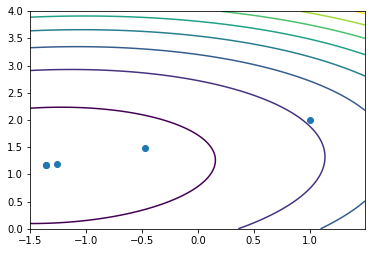

4


In [76]:
x     = [1.]
y     = [2.]

n_max = 100
[x,y, n_iter] = algorithme_Newton_h(x[0],y[0],direction_Newton_h,n_max,res_max)

fig4   = plt.figure(4)
delta  = 0.005
x_grid = np.arange(-1.5, 1.5, delta)
y_grid = np.arange( 0., 4.0, delta)
Z      = [[h(x0,x1) for x0 in x_grid] for x1 in y_grid]
CS     = plt.contour(x_grid,y_grid,Z)
plt.scatter(x,y)
plt.show()

print(n_iter)